<a href="https://colab.research.google.com/github/yrsheld/Practice/blob/main/my_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Network

In [1]:
%tensorflow_version 2.x

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


### Dataset
Use the MNIST Fashion Dataset from keras.

Includes 60,000 images for training and 10,000 images for validation/testing.

In [5]:
fashion_mnist = keras.datasets.fashion_mnist # load dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [6]:
train_images.shape

(60000, 28, 28)

In [7]:
train_images[0, 23, 23]  # look at one pixel

194

We can see that our pixel values are between 0(black)~255(white).

This means we have a grayscale image.

In [8]:
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

We have 10 training labels (i.e, 10 classes)

In [9]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

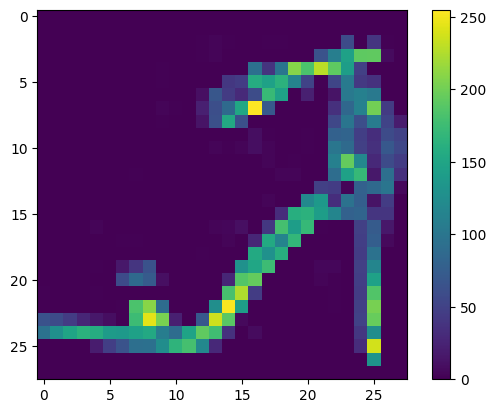

In [16]:
plt.figure()
plt.imshow(train_images[8])
plt.colorbar()
plt.show()

### Data Preprocessing
Scale grayscale pixel values (0~200) to 0~1.

Typically, it would be nice to rescale your input values in that range, say -1 to 1. Becuase NN starts with random weights and biases in between 0~1. If you have large input values and small weights, than it would create a mismatch, making it harder to update the values.

In [17]:
# Rescale from 0~255 to 0~1
train_images = train_images / 255.0
test_images = test_images / 255.0

### Build model
We would build a feed-forward NN

The output layer would be 10 neurons, each with value of the proability of belonging to that class. So we use softmax activation there, in order to compute the probabiliity distribution of each class.

In [18]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),     # input layer  (784 neurons)
    keras.layers.Dense(127, activation='relu'),    # hidden layer
    keras.layers.Dense(10, activation='softmax')   # output layer
])

### Compile model

Define optimizer, loss, and metrics here.

In [19]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])    # the output we want to see

### Training the model

In the following, we would do the training, evaluation, testing, just as before. But you can see it is much simple here, because keras has handled everything for us. We no longer need to define the input function.

* Recall in `tf.estimator.LinearClassifier` & `tf.estimator.DNNClassifier`, we need to pass in the input functions defined by ourselves.
```
est.train(train_input_fn),
est.evaluate(eval_input_fn),
est.predict(eval_input_fn),
```

* Whereas here in keras model, we simply pass in the data and labels.
```
model.fit(train_data, train_labels, epoch=...)
model.evaluate(test_data, test_labels, verbose...)
model.predict(test_images)
```




In [20]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4945 - accuracy: 0.8270
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3781 - accuracy: 0.8641
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3367 - accuracy: 0.8785
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3129 - accuracy: 0.8845
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2949 - accuracy: 0.8914
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2797 - accuracy: 0.8969
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2687 - accuracy: 0.8992
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2571 - accuracy: 0.9038
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2479 - accuracy: 0.9064
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.239

### Evaluate the model

In [24]:
# result = [test_loss, test_accuracy]
result = model.evaluate(test_images, test_labels, verbose=1)  #verbose=1: progress bar

print('Test loss', result[0])
print('Test accuracy', result[1])

313/313 [==============================] - 0s 1ms/step - loss: 0.3300 - accuracy: 0.8854
Test loss 0.3300052583217621
Test accuracy 0.8853999972343445


In [23]:
result

[0.3300052583217621, 0.8853999972343445]

### Predictions

In [32]:
# a list of predictions for each data
predictions = model.predict(test_images)

313/313 [==============================] - 0s 1ms/step


In [26]:
len(predictions)  # prediction on all test images (10000)

10000

In [33]:
predictions[0]

array([1.6165370e-07, 2.4340532e-10, 3.1153579e-06, 9.0303390e-12,
       1.4137117e-07, 1.9632677e-04, 2.4356495e-07, 1.2082568e-03,
       2.4197107e-08, 9.9859172e-01], dtype=float32)

In [37]:
data_id = 5
predicted_class = np.argmax(predictions[data_id])
print("Predicted class:", predicted_class)
print("Actual label:", test_labels[data_id])

Predicted class: 1
Actual label: 1
